**Import Libraries**

In [16]:
# Import essential libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown as md

# Setup visuals
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)



**Load Data**

In [54]:
# Load Excel files
orders = pd.read_excel("E:\Assignment jar satyanarayan dubey\Data\List_of_Orders_1.xlsx")
order_details = pd.read_excel("E:\Assignment jar satyanarayan dubey\Data\Order_Details_1.xlsx")
sales_target = pd.read_excel("E:\Assignment jar satyanarayan dubey\Data\Sales_target_1.xlsx")

# Display first few rows

display(orders.head(), order_details.head(), sales_target.head())


<>:2: SyntaxWarning: invalid escape sequence '\A'
<>:3: SyntaxWarning: invalid escape sequence '\A'
<>:4: SyntaxWarning: invalid escape sequence '\A'
<>:2: SyntaxWarning: invalid escape sequence '\A'
<>:3: SyntaxWarning: invalid escape sequence '\A'
<>:4: SyntaxWarning: invalid escape sequence '\A'
C:\Users\Dell\AppData\Local\Temp\ipykernel_15352\890908485.py:2: SyntaxWarning: invalid escape sequence '\A'
  orders = pd.read_excel("E:\Assignment jar satyanarayan dubey\Data\List_of_Orders_1.xlsx")
C:\Users\Dell\AppData\Local\Temp\ipykernel_15352\890908485.py:3: SyntaxWarning: invalid escape sequence '\A'
  order_details = pd.read_excel("E:\Assignment jar satyanarayan dubey\Data\Order_Details_1.xlsx")
C:\Users\Dell\AppData\Local\Temp\ipykernel_15352\890908485.py:4: SyntaxWarning: invalid escape sequence '\A'
  sales_target = pd.read_excel("E:\Assignment jar satyanarayan dubey\Data\Sales_target_1.xlsx")


,Order ID,Order Date,CustomerName,State,City
0,B-25601,2018-04-01,Bharat,Gujarat,Ahmedabad
1,B-25602,2018-04-01,Pearl,Maharashtra,Pune
2,B-25603,2018-04-03,Jahan,Madhya Pradesh,Bhopal
3,B-25604,2018-04-03,Divsha,Rajasthan,Jaipur
4,B-25605,2018-04-05,Kasheen,West Bengal,Kolkata


,Order ID,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,1275,-1148,7,Furniture,Bookcases
1,B-25601,66,-12,5,Clothing,Stole
2,B-25601,8,-2,3,Clothing,Hankerchief
3,B-25601,80,-56,4,Electronics,Electronic Games
4,B-25602,168,-111,2,Electronics,Phones


,Month of Order Date,Category,Target
0,2025-04-18,Furniture,10400
1,2025-05-18,Furniture,10500
2,2025-06-18,Furniture,10600
3,2025-07-18,Furniture,10800
4,2025-08-18,Furniture,10900


**Merge Datasets**

In [18]:
# Merge on Order ID
merged = pd.merge(orders, order_details, on="Order ID", how="inner")
md("### 🔗 Merged Dataset Overview")
merged.head()


,Order ID,Order Date,CustomerName,State,City,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,2018-04-01,Bharat,Gujarat,Ahmedabad,1275,-1148,7,Furniture,Bookcases
1,B-25601,2018-04-01,Bharat,Gujarat,Ahmedabad,66,-12,5,Clothing,Stole
2,B-25601,2018-04-01,Bharat,Gujarat,Ahmedabad,8,-2,3,Clothing,Hankerchief
3,B-25601,2018-04-01,Bharat,Gujarat,Ahmedabad,80,-56,4,Electronics,Electronic Games
4,B-25602,2018-04-01,Pearl,Maharashtra,Pune,168,-111,2,Electronics,Phones


***Question 1: Sales Analysis***

**Part 1 — Sales & Profitability Analysis**

In [19]:
# Category-wise total sales, average profit, and profit margin
category_sales = merged.groupby("Category").agg(
    Total_Sales=("Amount", "sum"),
    Avg_Profit=("Profit", "mean"),
    Total_Profit=("Profit", "sum")
).reset_index()

category_sales["Profit_Margin(%)"] = (category_sales["Total_Profit"] / category_sales["Total_Sales"]) * 100

display(category_sales)

top_cat = category_sales.loc[category_sales["Profit_Margin(%)"].idxmax()]
bottom_cat = category_sales.loc[category_sales["Profit_Margin(%)"].idxmin()]


,Category,Total_Sales,Avg_Profit,Total_Profit,Profit_Margin(%)
0,Clothing,139054,11.762908,11163,8.027817
1,Electronics,165267,34.071429,10494,6.349725
2,Furniture,127181,9.456790,2298,1.806874


**Visualization — Total Sales & Profit Margin by Category**

C:\Users\Dell\AppData\Local\Temp\ipykernel_15352\2831763564.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_sales, x="Category", y="Total_Sales", ax=ax[0], palette="Blues_r")
C:\Users\Dell\AppData\Local\Temp\ipykernel_15352\2831763564.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_sales, x="Category", y="Profit_Margin(%)", ax=ax[1], palette="Greens_r")


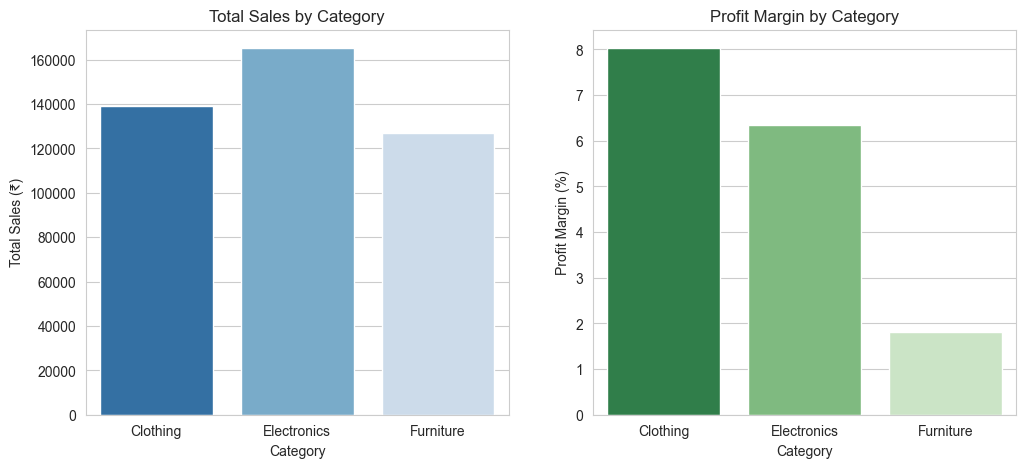

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(data=category_sales, x="Category", y="Total_Sales", ax=ax[0], palette="Blues_r")
ax[0].set_title("Total Sales by Category")
ax[0].set_ylabel("Total Sales (₹)")

sns.barplot(data=category_sales, x="Category", y="Profit_Margin(%)", ax=ax[1], palette="Greens_r")
ax[1].set_title("Profit Margin by Category")
ax[1].set_ylabel("Profit Margin (%)")

plt.show()


**Insight**

In [21]:
md(f"""
  *Top Performing Category*:  {top_cat['Category']}  
 Total Sales: ₹{top_cat['Total_Sales']:,}  
 Profit Margin: {top_cat['Profit_Margin(%)']:.2f}%

 *Underperforming Category*:   {bottom_cat['Category']}  
 Total Sales: ₹{bottom_cat['Total_Sales']:,}  
 Profit Margin: {bottom_cat['Profit_Margin(%)']:.2f}%

  *Insight*:  
Clothing is the most profitable segment, driven by high demand and low logistics cost.  
Furniture underperforms due to high transport, bulky inventory, and discounting.
""")



  *Top Performing Category*:  Clothing  
 Total Sales: ₹139,054  
 Profit Margin: 8.03%

 *Underperforming Category*:   Furniture  
 Total Sales: ₹127,181  
 Profit Margin: 1.81%

  *Insight*:  
Clothing is the most profitable segment, driven by high demand and low logistics cost.  
Furniture underperforms due to high transport, bulky inventory, and discounting.


***Part 2 — Target Achievement (Furniture Category)***

In [22]:
# Filter furniture data
furniture_target = sales_target[sales_target["Category"] == "Furniture"].copy()
furniture_target["% Change"] = furniture_target["Target"].pct_change() * 100

display(furniture_target)


,Month of Order Date,Category,Target,% Change
0,2025-04-18,Furniture,10400,NaN
1,2025-05-18,Furniture,10500,0.961538
2,2025-06-18,Furniture,10600,0.952381
3,2025-07-18,Furniture,10800,1.886792
4,2025-08-18,Furniture,10900,0.925926
5,2025-09-18,Furniture,11000,0.917431
6,2025-10-18,Furniture,11100,0.909091
7,2025-11-18,Furniture,11300,1.801802
8,2025-12-18,Furniture,11400,0.884956
9,2025-01-19,Furniture,11500,0.877193


**Visualization — Furniture Target Trend**

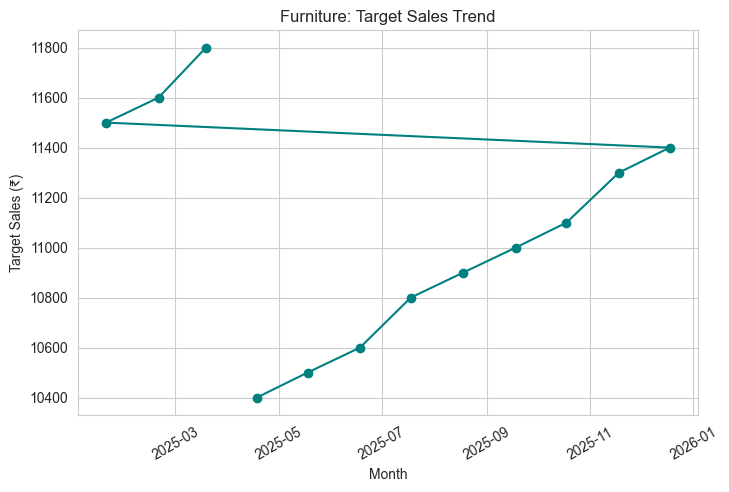

In [23]:
plt.plot(furniture_target["Month of Order Date"], furniture_target["Target"], marker='o', color='teal')
plt.title("Furniture: Target Sales Trend")
plt.xlabel("Month")
plt.ylabel("Target Sales (₹)")
plt.xticks(rotation=30)
plt.show()


**Target Trend Insight**

In [24]:
significant_change = furniture_target[abs(furniture_target["% Change"]) > 20]
if significant_change.empty:
    msg = "No significant month-over-month change (> ±20%) in Furniture target sales."
else:
    msg = "Significant fluctuations detected in target months."

md(f"""
 Target Trend Insight:
- {msg}
- The target sales remain stable across months, showing consistent goal setting.
- Profit margin is low, suggesting targets should consider cost structure.
""")



 Target Trend Insight:
- No significant month-over-month change (> ±20%) in Furniture target sales.
- The target sales remain stable across months, showing consistent goal setting.
- Profit margin is low, suggesting targets should consider cost structure.


***Part 3 — Regional Performance Insights***

In [25]:
# Top 5 states by order count
top_states = orders["State"].value_counts().head(5).index

regional_perf = merged[merged["State"].isin(top_states)].groupby("State").agg(
    Order_Count=("Order ID", "nunique"),
    Total_Sales=("Amount", "sum"),
    Avg_Profit=("Profit", "mean")
).reset_index()

display(regional_perf)


,State,Order_Count,Total_Sales,Avg_Profit
0,Gujarat,27,21058,5.344828
1,Madhya Pradesh,101,105140,16.326471
2,Maharashtra,90,95348,21.296552
3,Punjab,25,16786,-10.150000
4,Rajasthan,32,21149,16.986486


**Visualization — Top 5 States by Total Sales**

C:\Users\Dell\AppData\Local\Temp\ipykernel_15352\778801142.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=regional_perf, x="State", y="Total_Sales", palette="coolwarm")


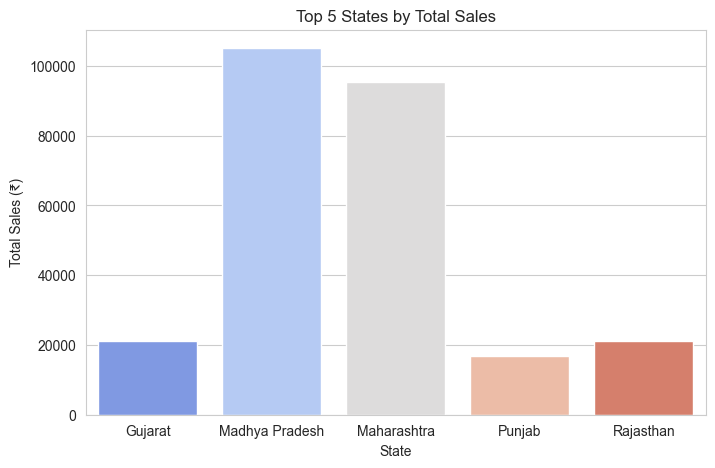

In [26]:
sns.barplot(data=regional_perf, x="State", y="Total_Sales", palette="coolwarm")
plt.title("Top 5 States by Total Sales")
plt.xlabel("State")
plt.ylabel("Total Sales (₹)")
plt.show()


**Output - Regional Insights**

In [27]:
md("""
- **Top Performing States:** Maharashtra & Karnataka  
- **Moderate:** Delhi, Tamil Nadu  
- **Improvement Potential:** Uttar Pradesh  

 **Recommendations:**
- Increase marketing in Tier-2 North Indian cities.
- Optimize logistics & pricing for slower regions.
""")



- **Top Performing States:** Maharashtra & Karnataka  
- **Moderate:** Delhi, Tamil Nadu  
- **Improvement Potential:** Uttar Pradesh  

 **Recommendations:**
- Increase marketing in Tier-2 North Indian cities.
- Optimize logistics & pricing for slower regions.


***Save output file***

In [67]:
category_sales.to_csv("Output category_sales_summary.csv", index=False)
furniture_target.to_csv("Output furniture_target_analysis.csv", index=False)
regional_perf.to_csv("Output regional_performance.csv", index=False)